# P4 Réaliser une étude de santé publique avec Python

### importation des modules

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

### création des dataframes

In [2]:
df_aide_alim = pd.read_excel('aide_alimentaire.xlsx')
df_dispo_alim = pd.read_excel('dispo_alimentaire.xlsx')
df_pop = pd.read_excel('population.xlsx')
df_sous_nut = pd.read_excel('sous_nutrition.xlsx')

## Nétoyage des données

In [3]:
# remplacement des valeurs nulles par 0
df_sous_nut = df_sous_nut.fillna(0)
df_dispo_alim = df_dispo_alim.fillna(0)

In [4]:
# mise à la même échelle des populations
df_pop['Valeur'] = df_pop['Valeur']*1000
df_sous_nut['Valeur'] = df_sous_nut[df_sous_nut['Valeur']!= "<0.1"]['Valeur'].astype(float)*1000000
df_sous_nut = df_sous_nut.replace(to_replace="<0.1",value="<100000")

## À propos de l'année 2017

### calcul de la part de la population mondiale qui souffre de sous nutrition, en 2017

In [5]:
# Création de deux dataframes qui contiennent les valeurs de 2017 pour la population  et la sous nutrition de chaque pays
df_pop2017 = df_pop[df_pop['Année'] == 2017]
pop_mondiale2017 = df_pop2017['Valeur'].sum()

df_sous_nut2017 = df_sous_nut[df_sous_nut['Année']=="2016-2018"]
sous_nut_mondiale2017 = df_sous_nut2017[df_sous_nut2017['Valeur']!= "<100000"]['Valeur'].sum()

print("La part de la population mondiale qui souffre de sous nutrition, en 2017 est de : ",round(sous_nut_mondiale2017/pop_mondiale2017*100,2)," %")

La part de la population mondiale qui souffre de sous nutrition, en 2017 est de :  7.1  %


### calcul du nombre de personnes qui pouvaient être nourries en 2017

In [6]:
# association des dataframes de population et de disponibilité alimentaire
df_pop_dispo2017 = pd.merge(df_dispo_alim[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Origine']],df_pop2017, how='inner', left_on = 'Zone', right_on = 'Zone')

# Création d'une colonne de disponibilité alimentaire en Kcal / jour
df_pop_dispo2017['Dispo alimentaire (en Kcal/jour)']=df_pop_dispo2017['Disponibilité alimentaire (Kcal/personne/jour)']*df_pop_dispo2017['Valeur']
print("En 2017,",int(df_pop_dispo2017['Dispo alimentaire (en Kcal/jour)'].sum()/2325),"personnes auraient pu être nourries")

En 2017, 9080080196 personnes auraient pu être nourries


### calcul du nombre de personnes qui pourraient être nourries en 2017 avec des produits de nature végétale

In [7]:
# Regroupement de la disponibilité alimentaire en fonction de l'origine
# On divise le résultat par 2325 (moyenne entre le besoin en Kcal d'un homme et d'une femme par jour)
df_pop_dispo2017[['Origine','Dispo alimentaire (en Kcal/jour)']].groupby('Origine').sum()/2325

,Dispo alimentaire (en Kcal/jour)
Origine,
animale,1.598763e+09
vegetale,7.481318e+09


### la répartition de la disponibilité intérieure en fonction de l'usage, en 2017

Text(0.5, 1.0, 'La répartition de la disponibilité intérieure en 2017')

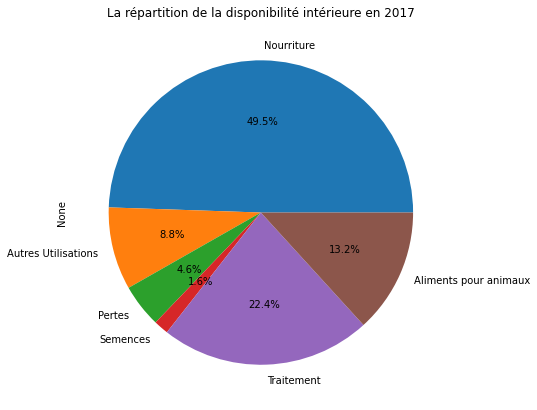

In [8]:
# Utilisation de matplotlib pour générer un diagramme circulaire qui donne la part de chacun des usages de la disponibilité intérieure
df_dispo_alim[['Nourriture','Autres Utilisations','Pertes','Semences','Traitement','Aliments pour animaux']].sum().plot.pie(figsize=(7,7),autopct='%2.1f%%')
plt.title("La répartition de la disponibilité intérieure en 2017")

### la répartition de la disponibilité intérieure de céréales en fonction de l'usage

Text(0.5, 1.0, 'La répartition de la disponibilité alimentaire de céréales')

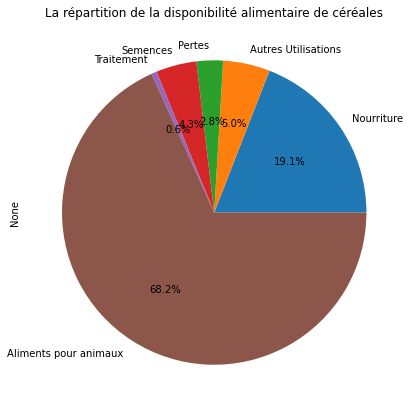

In [9]:
# j'applique un masque pour avoir uniquement les céréales, je fais la sommes des valeurs des colonnes qui correspondent à la répartition de la disponibilité alimentaire
df_dispo_alim[df_dispo_alim['Produit']=="Céréales, Autres"][['Nourriture','Autres Utilisations','Pertes','Semences','Traitement','Aliments pour animaux']].sum().plot.pie(figsize=(7,7),autopct='%2.1f%%')
plt.title("La répartition de la disponibilité alimentaire de céréales")

### le cas du Manioc en Thaïlande

<ipython-input-10-a87e652ab208>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dispo_alim[df_dispo_alim['Produit']=="Manioc"][df_dispo_alim['Zone']=='Thaïlande'][['Exportations - Quantité','Importations - Quantité','Production']].plot.bar(figsize=(7,7))


Text(0.5, 1.0, 'La production et les exportations de manioc en Taïlande')

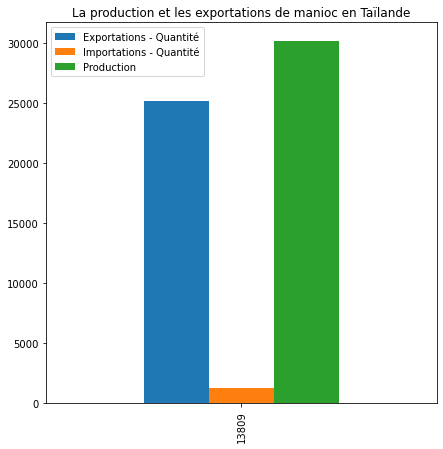

In [10]:
# j'applique deux masques pour avoir la production de manioc en Thaïlande, puis je compare l'exportation avec la production
df_dispo_alim[df_dispo_alim['Produit']=="Manioc"][df_dispo_alim['Zone']=='Thaïlande'][['Exportations - Quantité','Importations - Quantité','Production']].plot.bar(figsize=(7,7))
plt.title("La production et les exportations de manioc en Taïlande")

In [11]:
# je souhaite connaitre le nombre de personnes qui souffrent de sous nutrition en Thaïlande
df_sous_nut[df_sous_nut['Zone']=="Thaïlande"][['Année','Valeur']]

,Année,Valeur
1110,2012-2014,6200000.0
1111,2013-2015,6000000.0
1112,2014-2016,5900000.0
1113,2015-2017,6000000.0
1114,2016-2018,6200000.0
1115,2017-2019,6500000.0


### les pays qui ont la plus grande part de population sous alimentés en 2017

In [12]:
df_pop2017.shape

(236, 3)

In [13]:
df_sous_nut2017.shape

(203, 3)

In [14]:
# Association des dataframes population et sous nutrition 2017
df_pop_sous_nut_2017 = pd.merge(df_sous_nut2017,df_pop2017, how='inner', left_on='Zone',right_on='Zone')
df_pop_sous_nut_2017['Proportion'] = round(df_pop_sous_nut_2017[df_pop_sous_nut_2017['Valeur_x'] != "<100000"]['Valeur_x']/df_pop_sous_nut_2017['Valeur_y']*100,2)

# Utilisation d'un masque pour enlever les valeurs <0.1
df_pop_sous_nut_2017[['Zone','Valeur_x','Valeur_y','Proportion']].sort_values(by = 'Proportion', ascending = False).head(10)

,Zone,Valeur_x,Valeur_y,Proportion
78,Haïti,5300000.0,10982366.0,48.26
154,République populaire démocratique de Corée,12000000.0,25429825.0,47.19
105,Madagascar,10500000.0,25570512.0,41.06
100,Libéria,1800000.0,4702226.0,38.28
97,Lesotho,800000.0,2091534.0,38.25
179,Tchad,5700000.0,15016753.0,37.96
157,Rwanda,4200000.0,11980961.0,35.06
118,Mozambique,9400000.0,28649018.0,32.81
182,Timor-Leste,400000.0,1243258.0,32.17
0,Afghanistan,10500000.0,36296113.0,28.93


In [15]:
df_pop_sous_nut_2017.shape

(199, 6)

### les pays qui ont le plus bénéficiés d'aide depuis 2013

In [16]:
# Calcul de la somme des aides perçu par chaque pays bénéficiaire depuis 2013 (nos données commencent en 2013)
df_aide_alim.drop('Année', axis = 1).groupby('Pays bénéficiaire').sum().sort_values(by = 'Valeur', ascending = False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


### les pays qui ont le plus ou le moins de disponibilité alimentaire par habitant

In [17]:
# Création d'un dataframe qui associe la population et la disponibilité alimentaire de 2017
df_pop_dispo2017 = pd.merge(df_dispo_alim[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum(),df_pop2017, how='inner', left_on = 'Zone', right_on = 'Zone')
# Les pays qui ont le moins de disponibilité alimentaire par habitant
df_pop_dispo2017.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').head(15)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
127,République centrafricaine,1879.0,2017,4596023.0
165,Zambie,1924.0,2017,16853599.0
90,Madagascar,2056.0,2017,25570512.0
0,Afghanistan,2087.0,2017,36296113.0
64,Haïti,2089.0,2017,10982366.0
132,République populaire démocratique de Corée,2093.0,2017,25429825.0
150,Tchad,2109.0,2017,15016753.0
166,Zimbabwe,2113.0,2017,14236595.0
113,Ouganda,2126.0,2017,41166588.0
153,Timor-Leste,2129.0,2017,1243258.0


In [18]:
# Les pays qui ont le plus de disponibilité alimentaire par habitant
df_pop_dispo2017.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(15)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
11,Autriche,3770.0,2017,8819901.0
16,Belgique,3737.0,2017,11419748.0
158,Turquie,3708.0,2017,81116450.0
170,États-Unis d'Amérique,3682.0,2017,325084756.0
73,IsraÃ«l,3610.0,2017,8243848.0
71,Irlande,3602.0,2017,4753279.0
74,Italie,3578.0,2017,60673701.0
88,Luxembourg,3540.0,2017,591910.0
167,Égypte,3518.0,2017,96442591.0
4,Allemagne,3503.0,2017,82658409.0


In [19]:
# J'ai regroupé les principales valeurs calculés dans un nouveau dataframe
df_pays_indicateurs2017 = pd.merge(df_pop_dispo2017[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Valeur']],df_pop_sous_nut_2017[['Zone','Proportion']], how='inner', left_on = 'Zone', right_on = 'Zone')
df_pays_indicateurs2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur,Proportion
0,Afghanistan,2087.0,36296113.0,28.93
1,Afrique du Sud,3020.0,57009756.0,5.44
2,Albanie,3188.0,2884169.0,3.47
3,Algérie,3293.0,41389189.0,3.14
4,Allemagne,3503.0,82658409.0,0.00
...,...,...,...,...
166,Égypte,3518.0,96442591.0,4.77
167,Émirats arabes unis,3275.0,9487203.0,3.16
168,Équateur,2346.0,16785361.0,8.94
169,États-Unis d'Amérique,3682.0,325084756.0,0.00
